<a href="https://colab.research.google.com/github/PW-5214/AI-Product-Development-/blob/main/Covid_19_Chest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras import models

In [ ]:
import zipfile
import os

zip_path = "archive (4).zip"
extract_path = "dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

os.listdir(extract_path)

['COVID-19_Radiography_Dataset']

In [ ]:
for folder in os.listdir("dataset"):
    print(folder, "->", os.listdir(f"dataset/{folder}")[:3])

COVID-19_Radiography_Dataset -> ['README.md.txt', 'Lung_Opacity.metadata.xlsx', 'Normal.metadata.xlsx']


In [ ]:
DATASET_PATH = "dataset/COVID-19_Radiography_Dataset"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(224,224),
    batch_size=32,
    color_mode="grayscale"
)

Found 42330 files belonging to 4 classes.
Using 33864 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,     # 20% validation
    subset="validation",
    seed=42,
    image_size=(224,224),
    batch_size=32,
    color_mode="grayscale"
)

Found 42330 files belonging to 4 classes.
Using 8466 files for validation.


In [ ]:
class_names = train_ds.class_names
print("Classes:", class_names)

Classes: ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']


In [ ]:
normalization_layer = layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
model = models.Sequential()
# Layer 1
model.add(layers.Conv2D(32,(3,3),activation ='relu',input_shape=(224,224,1)))
model.add(layers.MaxPooling2D((2,2)))
#Layer 2
model.add(layers.Conv2D(64,(3,3),activation ='relu'))
model.add(layers.MaxPooling2D((2,2)))
#Layer 3
model.add(layers.Conv2D(128,(3,3),activation ='relu'))
model.add(layers.MaxPooling2D((2,2)))

# Flatten Layer
model.add(layers.Flatten())

# Hidden Layer
model.add(layers.Dense(128,activation='relu'))

## Dropout layer
model.add(layers.Dropout(0.5))

# Output Layer (4 classes)
model.add(layers.Dense(4,activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,168,900 (42.61 MB)

 Trainable params: 11,168,900 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 85s 73ms/step - accuracy: 0.5782 - loss: 0.9849 - val_accuracy: 0.7231 - val_loss: 0.7019
Epoch 2/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 64s 60ms/step - accuracy: 0.7192 - loss: 0.6906 - val_accuracy: 0.7597 - val_loss: 0.5948
Epoch 3/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 82s 60ms/step - accuracy: 0.7585 - loss: 0.6012 - val_accuracy: 0.7781 - val_loss: 0.5621
Epoch 4/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 63s 59ms/step - accuracy: 0.7867 - loss: 0.5379 - val_accuracy: 0.7850 - val_loss: 0.5529
Epoch 5/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 63s 59ms/step - accuracy: 0.8105 - loss: 0.4801 - val_accuracy: 0.7900 - val_loss: 0.5387
Epoch 6/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 82s 59ms/step - accuracy: 0.8310 - loss: 0.4263 - val_accuracy: 0.7938 - val_loss: 0.5719
Epoch 7/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 62s 59ms/step - accuracy: 0.8481 - loss: 0.3819 - val_accuracy: 0.7854 - val_loss: 0.5774
Epoch 8/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 63s 59ms/step - accuracy: 0.8649 -

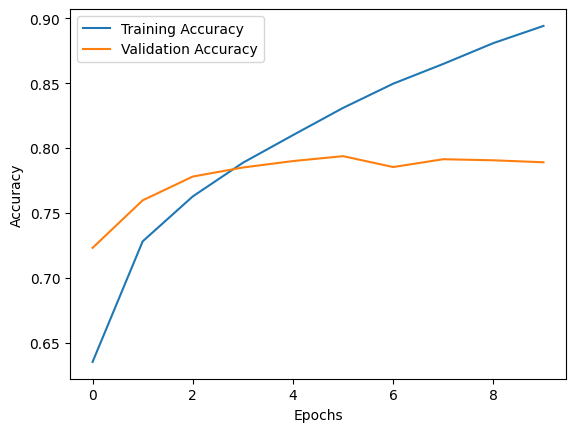

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
loss, accuracy = model.evaluate(val_ds)
print("Validation Accuracy:", accuracy)


265/265 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.7918 - loss: 0.7596
Validation Accuracy: 0.7890384793281555


In [ ]:
model.save("covid_xray_model_tf.h5")

In [ ]:
import os
import tensorflow as tf

DATASET_PATH = "dataset/COVID-19_Radiography_Dataset"

# choose class
class_name = "COVID"

# go inside images folder automatically
image_dir = os.path.join(DATASET_PATH, class_name, "images")

# pick first image
img_path = os.path.join(image_dir, os.listdir(image_dir)[0])

img = tf.keras.preprocessing.image.load_img(
    img_path,
    target_size=(224,224),
    color_mode="grayscale"
)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import tensorflow as tf

class_names = ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']

prediction = model.predict(img)
predicted_class = class_names[tf.argmax(prediction[0])]

print("Predicted Class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Class: COVID
